## Data Prep:

1. Read in the data and apply your data prep function to it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Function that train_test_split
####
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [3]:
income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_prep(income)

In [4]:
income.tail()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31977,29,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
income.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Assignment 1:

1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [14]:
from sklearn.preprocessing import StandardScaler
#STD
std = StandardScaler()

X_train_std = std.fit_transform(X_train[["age", "hoursperweek"]])
X_test_std = std.transform(X_test[["age", "hoursperweek"]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.7609647408333985
Test Accuracy: 0.7542213883677298


In [9]:
print(confusion_matrix(y_train, knn.predict(X_train_std)))
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[18288  1114]
 [ 5001  1179]]
[[4566  315]
 [1257  258]]


<Axes: xlabel='age', ylabel='hoursperweek'>

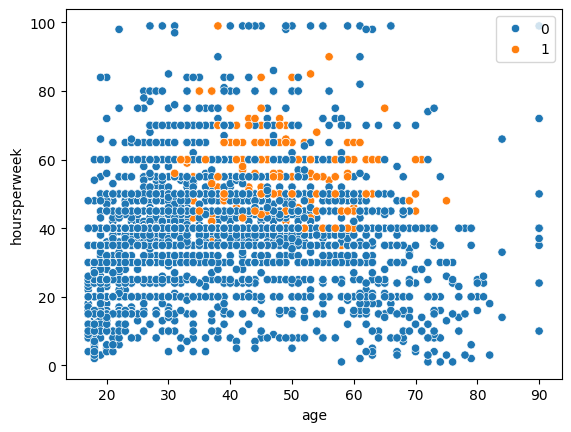

In [10]:
import seaborn as sns

sns.scatterplot(x=X_test["age"], y=X_test["hoursperweek"], hue=knn.predict(X_test_std))

In [17]:
!git add KNN_so.ipynb
!git commit -m "Assignment 1"
!git push origin master

[master 3ca4144] Assignment 1
 1 file changed, 190 insertions(+), 133 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 22 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 154.91 KiB | 1.67 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:Proftg/Maven-Classification.git
   2265417..3ca4144  master -> master


## Assignment 2: 

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [14]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8745211476819639
Test Accuracy: 0.8242651657285803


In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_std, y_train)
#Gridsearch
gridsearch.best_params_

In [ ]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

In [ ]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

In [ ]:
print(confusion_matrix(y_test, knn.predict(X_test_std)))

In [ ]:
!git add KNN_so.ipynb
!git commit -m "Assignment 2-update"
!git push origin master